<a href="https://colab.research.google.com/github/pragneshrana/DeepLearning/blob/master/SequenceModels/LSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem With RNN:
  - At new timestep the old information gets morphed by the current input
  - After t steps the information stored at time step t-k gets completely morphes
  - During backpropogation the information does not flow well


### Small WhiteBorad Analogy:

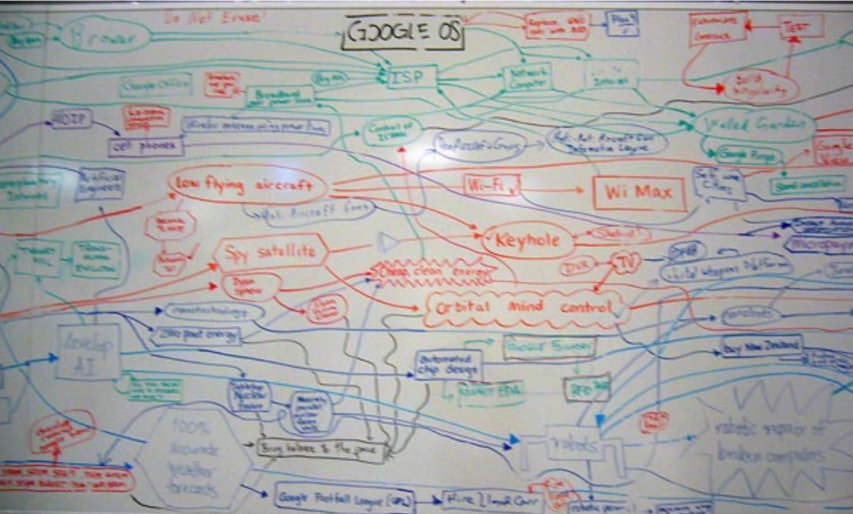

On smaller white board,\
if one want to solve mathematics problem then steps could be,
- Selectively write on the board
- Selectively read already wrriten content
- Selectively forget already wrriten conent

Ideal alberic problem should contains steps mentione below: \
Problem : $ac(bd+a)+ad$
- ac
- bd
- bd+a
- ac(bd+a)
- ad
- ac(bd+a)+ad

What if max you can write only 3 steps:
- 1. ac X--- 6.ac(bd+a)+ad
- 2. bd X --- 4.ac(bd+a) 
- 3. bd+a X--- 5.ad 

# Dealing with longer sequences
- Forget the inforation added by the stop words (a,the,etc)
- Selectively read the information added by previous sentiment bearing words (awesome, amazing, etc)
- selectively write new information from the current word to the state


Ex:
The first half was boring but **second half was good and actor was awesome**.

Wishlist approach: selective write, selective read and selective forget to ensure that this finite sized vaector is used effectively.

**LSTM memory cell:**

while computing $s_t$ and $s_{t-1}$ we want to use selective write, read and forget so that only important information is reatained in $s_t$

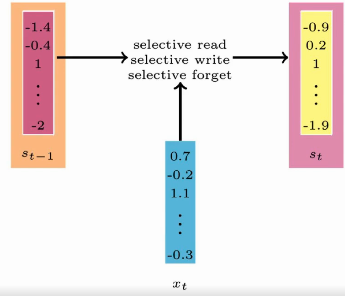

### LSTM Final Model :
- Rather than passing all the information, Gates are used to control the information passing.


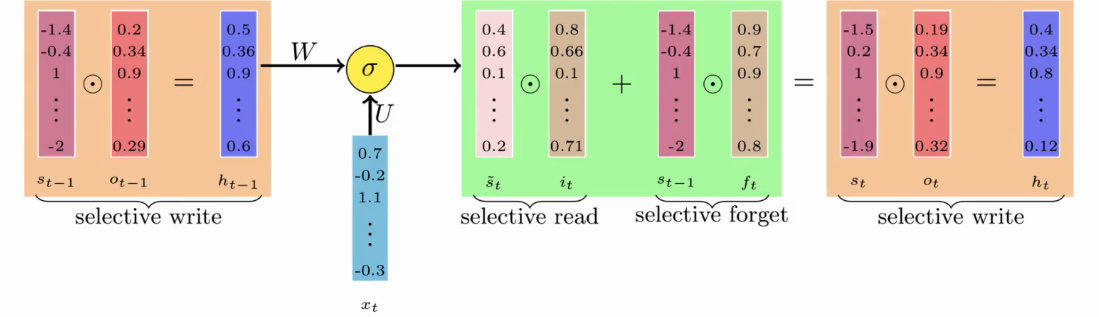

- Rather than passing all the information only required information is required to read, write and forget. Which is done by Multiplying the information using weights.

Gates :

- $\mathcal{o_t} = \sigma(W_o h_{t-1} + U_o x_t +b_o)$
- $\mathcal{i_t} = \sigma(W_i h_{t-1} + U_i x_t +b_i)$
- $\mathcal{f_t} = \sigma(W_f h_{t-1} + U_0 x_t +b_f)$

States:
- $\tilde s_t = \sigma (Wh_{t-1}+Ux_t+b$
- $s_t = f_t \odot s_{t-1} + i_t \odot \tilde s_t$
- $h_t = o_t \odot \sigma(s_t)$


# Gated Recurrent Unit

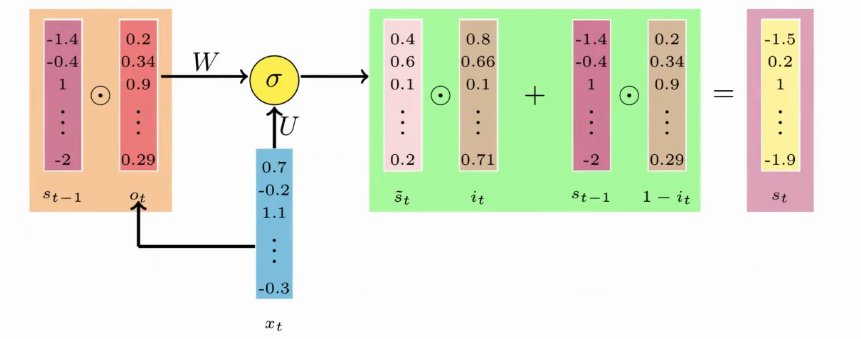

Gates :

- $\mathcal{o_t} = \sigma(W_o h_{t-1} + U_o x_t +b_o)$
- $\mathcal{i_t} = \sigma(W_i h_{t-1} + U_i x_t +b_i)$

States:
- $\tilde s_t = \sigma (Wh_{t-1}+Ux_t+b$
- $s_t = f_t \odot s_{t-1} + i_t \odot \tilde s_t$


- If the states at time $t-1$ did not contribute much to the state at tiem t ($||f_t \rightarrow  0||$ and $|o_{t-1} \rightarrow  0||$ hen during backpropogation the grading flowing into $s_{t-1}$ will vanish.

- The key difference from vanilla RNNs is that the flow of information and gradients is controlled by the gates which ensure that the gradients vanish when they should.

$\frac{\partial \mathcal{L}(\theta)}{\partial W} = \frac{\partial \mathcal{L}_t}{\partial s_t} = \sum_{k=1}^{t} \Pi_{j=k}^{t-1} \frac{\partial s_{j+1}}{s_j} \frac{\partial ^+ s_k}{\partial W}$

- If the loss at $\mathcal L$ was large because W was not good enough to compute $s_1$ correctly then this information will not be propogated back to W as the gradient will vanish

- The gradient of $\mathcal L_t$ vanishes when the gradients flowing through each and every path from $\mathcal L_t$ to $\theta_i$ vanishes

- The gradient of $\mathcal L_t$ explodes when the gradient flowing through at least one path explodes

### Dependency graph of LSTMs

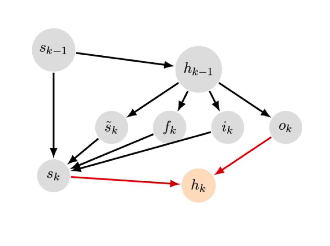

- $\mathcal{o_t} = \sigma(W_o h_{t-1} + U_o x_t +b_o)$
- $\mathcal{i_t} = \sigma(W_i h_{t-1} + U_i x_t +b_i)$
- $\mathcal{f_t} = \sigma(W_f h_{t-1} + U_0 x_t +b_f)$
- $\tilde s_t = \sigma (Wh_{t-1}+Ux_t+b$
- $s_t = f_t \odot s_{t-1} + i_t \odot \tilde s_t$
- $h_t = o_t \odot \sigma(s_t)$

# For full path:


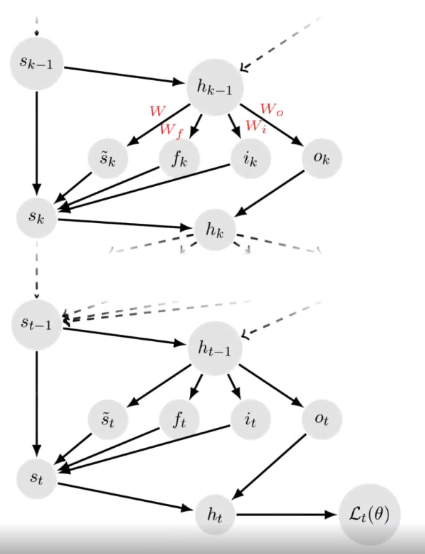

$t_0 = \frac{\partial \mathcal {L_t}}{\partial h_t} \cdot \frac{\partial h_t}{\partial s_{t}} \cdot \frac{\partial s_t}{\partial s_{t-1}} \dots \frac{\partial s_{k+1}}{\partial s_k}$

$ \frac{\partial \mathcal{L}_t}{\partial s_t} = \mathcal D (o_t \odot \sigma ' (s_t))$

$s_t = f_t \odot s_{t-1}+i_t \odot \tilde s_t$

$ \frac{\partial s_t}{\partial s_{t-1}} = \mathcal D (f_t))$

Here, $\mathcal D$ represent the diagonal matrix

$t_0 = \frac{\partial \mathcal {L_t}}{\partial h_t} \cdot \frac{\partial h_t}{\partial s_{t}} \cdot \frac{\partial s_t}{\partial s_{t-1}} \dots \frac{\partial s_{k+1}}{\partial s_k}$

$ t_0 = \mathcal L'_t(h_t) \cdot \mathcal D (o_t \odot \sigma ' (s_t)) \mathcal D (f_t) \dots \mathcal D (f_{k+1})$

$ t_0 = \mathcal L'_t(h_t) \cdot \mathcal D (o_t \odot \sigma ' (s_t)) \mathcal D (f_t \odot \dots \odot f_{k+1})$

$ t_0 = \mathcal L'_t(h_t) \cdot \mathcal D (o_t \odot \sigma ' (s_t)) \mathcal D (\odot_{i=k+1}^t f_i)$

As, term $\odot_{i=k+1}^t f_i$ has multiplication it can again explode or vanish but,
as gating control the information forward and backward direction, the information passed in forward direction has very small contribution then if for same path backward vanish of gradient is not a problem as already in forward path there was no contribution. 


(Inshort, If I haven't contibuted at all in forward, I don't care about what is happening backward)